In [383]:
# imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

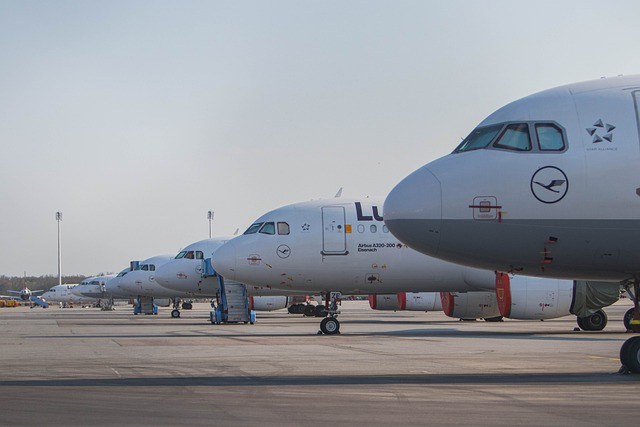
<center><font size='1'>Image by <a href = "https://pixabay.com/users/j0nqh-7668083" target="blank">Jonah de Graaff</a> from Pixabay</font></center>

# Exploring the FAA's Wildlife Strike Data Base

The FAA Wildlife Strike Database "contains records of reported wildlife strikes since 1990. Strike reporting is voluntary. Therefore, this database only represents the information we have received from airlines, airports, pilots, and other sources" [(FAA.gov)](https://wildlife.faa.gov/home). In this notebook, I explore this informative and excessive database to gain insights into the nature of wildlife strikes and their impact on aviation.

For more information on the variables of the database, please consult the `wildlife_export_explanation.xls` sheets. 

In [384]:
df = pd.read_csv("wildlife_export.csv", low_memory = False) 
# Updated 2021-01-22 at 09:00AM Eastern Time 

In [ ]:
df[df['AIRCRAFT'] != 'UNKNOWN'].shape

In [355]:
def gen_type(name):
    if (name.startswith('B-737')):
        if (len(name) > 7 and (name[6] == '1' or name[6] == '2')):
            return 'B-737 OG'
        if (len(name) > 7 and (name[6] == '3' or name[6] == '4' or name[6] == '5')):
            return 'B-737 CL'
        if (len(name) > 7 and (name[6] == '6' or name[6] == '7' or name[6] == '8' or name[6] == '9')):
            return 'B-737 NG' 
    if (name.startswith('B-747')):
        if (len(name) > 7 and (name[6] == '1' or name[6] == '2' or name[6] == '3')):
            return 'B-747-1/2/300'
        if (len(name) > 7 and name[6] == '4'):
            return 'B-747-400'
        if (len(name) > 7 and name[6] == '8'):
            return 'B-747-8'
        else:
            return 'B-747'
    if (name.startswith('B-717')): return 'B-717'
    if (name.startswith('B-727')): return 'B-727'
    if (name.startswith('B-757')): return 'B-757'
    if (name.startswith('B-767')): return 'B-767'
    if (name.startswith('B-777')): return 'B-777'
    if (name.startswith('B-787')): return 'B-787'
    if (name.startswith('A-3')): 
        if (len(name) > 4 and (name[3:5] == '18' or name[3:5] == '19' or name[3:5] == '20' or name[3:5] == '21' )):
            return 'A-320 Family' 
    if (name.startswith('EMB-1')): 
        if (len(name) > 5 and (name[5] == '7' or name[5] == '9' )):
            return 'EMB E-Jet Family' 
        if (len(name) > 5 and (name[5] == '4' or name[5] == '3' )):
            return 'EMB E-145 Family' 
    if (name.startswith('CRJ')): return 'CRJ'
    if (name.startswith('MD-8')): return 'MD-80 Family'
    if (name.startswith('MD-90-30')): return 'MD-90'
    if (name.startswith('DC-9')): return 'DC-9'
    if (name.startswith('DC-10')): return 'DC-10'
    if (name.startswith('MD-11')): return 'MD-11'
    return str(name)

In [356]:
ac_types = df[df['AIRCRAFT'] != 'UNKNOWN'].groupby(['AIRCRAFT']).count()['INDX_NR'].to_frame().reset_index()
ac_types['TYPE_FAM'] = ac_types['AIRCRAFT'].apply(lambda x: gen_type(x))

df['TYPE_FAM'] = df['AIRCRAFT'].apply(lambda x: gen_type(x))

ac_types.sort_values(by = 'INDX_NR', ascending = False).head()

,AIRCRAFT,INDX_NR,TYPE_FAM
76,B-737-700,12543,B-737 NG
8,A-320,11255,A-320 Family
72,B-737-300,9340,B-737 CL
309,CRJ100/200,8605,CRJ
79,B-737-800,8104,B-737 NG


In [357]:
ac_types_fam = ac_types.groupby('TYPE_FAM').sum().sort_values(by = 'INDX_NR', ascending = False).reset_index()
ac_types_fam.head() 

,TYPE_FAM,INDX_NR
0,B-737 NG,22551
1,A-320 Family,21771
2,CRJ,15391
3,B-737 CL,12789
4,MD-80 Family,8698


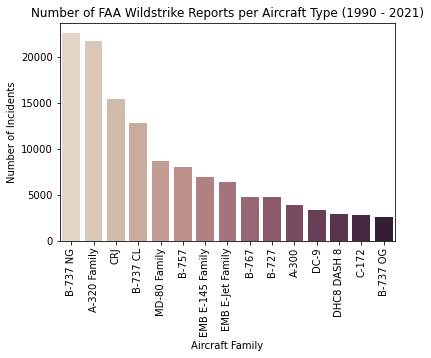

In [358]:
ac_types_plt = sns.barplot(x="TYPE_FAM", y = "INDX_NR", 
                           palette="ch:.25", 
                           data=ac_types_fam[:15])
ac_types_plt.set_xticklabels(ac_types_plt.get_xticklabels(), rotation=90)
ac_types_plt.set(xlabel='Aircraft Family', ylabel='Number of Incidents')
ac_types_plt.set_title('Number of FAA Wildstrike Reports per Aircraft Type (1990 - 2021)')
ac_types_plt

## Analysis 

### Bird Strikes dependent on the Flight Phase

In [359]:
phase_of_flight = df[['PHASE_OF_FLIGHT','HEIGHT','SPECIES','COMMENT']].copy()
# I convert to meters
phase_of_flight['HEIGHTM'] = phase_of_flight['HEIGHT']*0.3048 

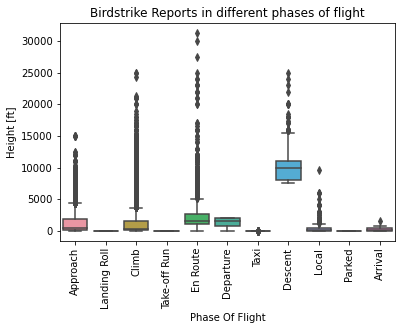

In [360]:
A1 = sns.boxplot(x="PHASE_OF_FLIGHT", y="HEIGHT", data =phase_of_flight[phase_of_flight['PHASE_OF_FLIGHT']!='Unknown'])
A1.set_xticklabels(A1.get_xticklabels(), rotation=90)
A1.set(xlabel='Phase Of Flight', ylabel='Height [ft]')
A1.set_title('Birdstrike Reports in different phases of flight')
plt.show()

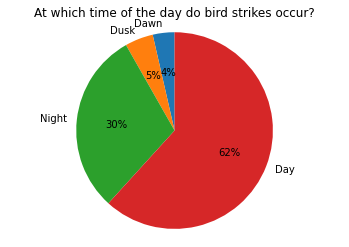

In [361]:
A2d = df.groupby('TIME_OF_DAY')['TIME_OF_DAY'].count().sort_values(ascending = True)
fig, A2 = plt.subplots()
A2.pie(A2d, labels = A2d.index, autopct='%1.f%%', startangle=90)
A2.axis('equal') 
A2.set_title('At which time of the day do bird strikes occur?')
plt.show() 

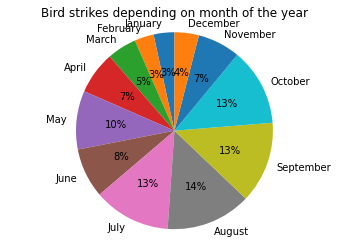

In [362]:
fig, A3 = plt.subplots()
A3.pie(df.groupby('INCIDENT_MONTH')['INCIDENT_MONTH'].count() , 
       labels = ['January', 'February', 'March', 
                 'April', 'May','June','July','August',
                 'September','October','November','December'], 
       autopct='%1.f%%', startangle=90)
A3.axis('equal') 
A3.set_title('Bird strikes depending on month of the year')
plt.show() 

Incidents with known damage values are shown. The Classes A to E are military damage categories.

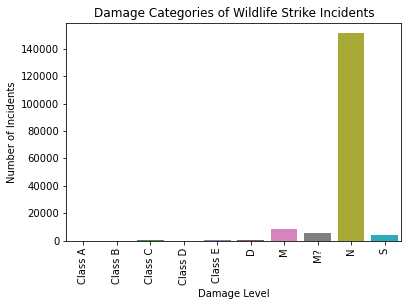

In [363]:
A4d = df.groupby('DAMAGE_LEVEL')['INDX_NR'].count().to_frame().reset_index()
A4d.columns = ['DMG_LVL', 'NR_INCIDENTS']
A4 = sns.barplot(x = 'DMG_LVL', y = 'NR_INCIDENTS', data = A4d)
A4.set_xticklabels(A4d['DMG_LVL'], rotation=90)
A4.set(xlabel='Damage Level', ylabel='Number of Incidents')
A4.set_title('Damage Categories of Wildlife Strike Incidents')
plt.show()

In [364]:
A4d.set_index('DMG_LVL')
A4d['TYPE'] = A4d['DMG_LVL'].apply(lambda x: 'M' if x.startswith('Class') else 'C')
A4d['PERCENTAGE'] = A4d.apply(lambda x: x.NR_INCIDENTS / A4d[A4d['TYPE'] == 'M'].NR_INCIDENTS.sum()*100 if x.TYPE == 'M' 
                              else x.NR_INCIDENTS / A4d[A4d['TYPE'] == 'C'].NR_INCIDENTS.sum()*100, axis = 1)
A4d 

,DMG_LVL,NR_INCIDENTS,TYPE,PERCENTAGE
0,Class A,1,M,0.186567
1,Class B,10,M,1.865672
2,Class C,81,M,15.111940
3,Class D,1,M,0.186567
4,Class E,443,M,82.649254
5,D,148,C,0.087510
6,M,8301,C,4.908233
7,M?,5420,C,3.204749
8,N,151105,C,89.345687
9,S,4150,C,2.453821


The overwhelming number of incidents result in no reported damage (`N`) for civilian (89.3\%) and less than $20.000 or `Class E` (which includes no costs) for military airplanes (82.6\%). 

## Engine Number and Placement

The convention for the numbering of engines is from left to right from the pilot's perspective, who faces forward. From looking at the data, this seems to be the case here, too. 

In [365]:
nr_eng = df[['TYPE_FAM', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'TYPE_ENG',
            'DAM_ENG1','STR_ENG1','DAM_ENG2','STR_ENG2','DAM_ENG3','STR_ENG3','DAM_ENG4','STR_ENG4']] 
strck_eng_df = nr_eng[(nr_eng['STR_ENG1'] != False) | (nr_eng['STR_ENG2'] != False) |
                       (nr_eng['STR_ENG3'] != False) | (nr_eng['STR_ENG4'] != False)]

For twin-engine aircraft, the following statistics is found:

In [366]:
strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3','STR_ENG4']][strck_eng_df['NUM_ENGS'] == 2].sum()

STR_ENG1    10836
STR_ENG2     9470
STR_ENG3        6
STR_ENG4        5
dtype: int64

There are entries where engine 3 and 4 are listed as struck. A look at the entries where this inconsistency occurs reveals that in these cases, the number of engines is correctly listed, while the positional variables `ENG_`x`_POS` and the `STR_ENG`x variables cannot be consistently assigned. These entries will be left out of the further analysis. Similarly, for aircraft with 3 engines, the same sanity check is done, but this time, there are no inconsistently labeled variable pairs.

In [367]:
strck_eng_df[['TYPE_FAM','ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS','STR_ENG1',
              'STR_ENG2','STR_ENG3','STR_ENG4']][(strck_eng_df['NUM_ENGS'] == 2) & 
             ((strck_eng_df['STR_ENG4'] != False)|(strck_eng_df['STR_ENG3'] != False))]  

,TYPE_FAM,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,STR_ENG1,STR_ENG2,STR_ENG3,STR_ENG4
29581,B-737 NG,1.0,1.0,NaN,NaN,True,False,False,True
29873,A-320 Family,1.0,1.0,NaN,NaN,False,False,True,False
43920,B-737 NG,1.0,1.0,NaN,NaN,True,False,False,True
44630,A-300,1.0,1.0,NaN,NaN,False,False,True,True
45921,HAWKER 800,5.0,5.0,NaN,NaN,False,False,False,True
59125,B-757,1.0,1.0,NaN,NaN,False,False,False,True
60108,B-737 NG,1.0,1.0,NaN,NaN,False,False,True,False
60449,EMB E-Jet Family,1.0,1.0,NaN,NaN,False,False,True,False
132253,EMB E-145 Family,5.0,5.0,NaN,NaN,False,False,True,False
187841,A-10A,NaN,NaN,NaN,NaN,False,False,True,False


In [368]:
str_eng_2 = strck_eng_df[['STR_ENG1','STR_ENG2']][(strck_eng_df['NUM_ENGS'] == 2) & 
                                                            ((strck_eng_df['STR_ENG4'] == False) &  
                                                              (strck_eng_df['STR_ENG3'] == False))].sum()
str_eng_3 = strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3']][(strck_eng_df['NUM_ENGS'] == 3)].sum()
str_eng_4 = strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3','STR_ENG4']][(strck_eng_df['NUM_ENGS'] == 4)].sum()
str_eng_4_lr = pd.Series([str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'], str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4']],
                        index = ['left', 'right'])
str_eng_4_lr

left     557
right    466
dtype: int64

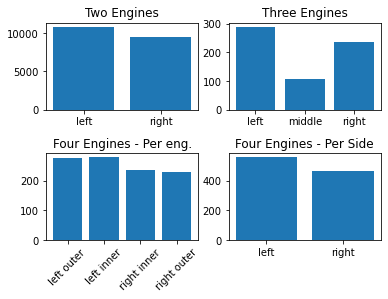

In [369]:
ax = plt.subplot(221) 
ax.bar(str_eng_2.index, str_eng_2.values) 
ax.set_xticklabels(['left','right']) 
ax.set_title("Two Engines")
ax = plt.subplot(222) 
ax.bar(str_eng_3.index, str_eng_3.values)
ax.set_xticklabels(['left','middle','right'])
ax.set_title("Three Engines")
ax = plt.subplot(223) 
ax.bar(str_eng_4.index, str_eng_4.values)
ax.set_xticklabels(['left outer','left inner','right inner', 'right outer'], rotation = 45)
ax.set_title("Four Engines - Per eng.")
ax = plt.subplot(224) 
ax.bar(str_eng_4_lr.index, str_eng_4_lr.values)
ax.set_title("Four Engines - Per Side")

plt.subplots_adjust(hspace=0.5)
plt.show()

Across all aircraft types, the graph shows a tendency of bird strikes to occur on the left side of the airplane. To investigate this further, a hypothesis test is conducted. We suspect the engines of one particular side to be involved into a bird strike incident more often than the other side and declare this the alternate hypothesis. The null hypothesis postulates equal probability. Note that incidents where bird strikes occur on both sides are also included.

$H_A: p_{side} \neq 0.5,\quad H_0: p_{side} = 0.5$

I will choose the hypotheses to be one-sided, i.e. $p_A > p_0$ for left side involvement $p_A < p_0$ for right side involvement.

In [370]:
from statsmodels.stats.proportion import proportions_ztest

# put data together 

len2 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 2) & ((strck_eng_df['STR_ENG4'] == False) &  
                                                           (strck_eng_df['STR_ENG3'] == False))])
len3 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 3) & ((strck_eng_df['STR_ENG1'] == True) |  
                                                           (strck_eng_df['STR_ENG3'] == True))]) 
len4 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 4)]) 
number_of_incidents = len2 + len3 + len4

str_all = pd.Series([((str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'])/len4
                     + (str_eng_3['STR_ENG1'])/len3
                     + (str_eng_2['STR_ENG1'])/len2)/3,  
                     ((str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4'])/len4
                     + (str_eng_3['STR_ENG3'])/len3
                     + (str_eng_2['STR_ENG2'])/len2)/3],
                        index = ['left', 'right']) 
str_all

left     0.575438
right    0.484546
dtype: float64

In [371]:
# p-values for the test H_0: p_left = 0.5, H_A: p_left > 0.5
print(proportions_ztest(str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'], len4, value = 0.5, alternative = 'larger')[1])
print(proportions_ztest(str_eng_3['STR_ENG1'], len3, value = 0.5, alternative = 'larger')[1])
print(proportions_ztest(str_eng_2['STR_ENG1'], len2, value = 0.5, alternative = 'larger')[1])
# p-values for the test H_0: p_right = 0.5, H_A: p_right < 0.5
print(proportions_ztest(str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4'], len4, value = 0.5, alternative = 'smaller')[1])
print(proportions_ztest(str_eng_3['STR_ENG3'], len3, value = 0.5, alternative = 'smaller')[1])
print(proportions_ztest(str_eng_2['STR_ENG2'], len2, value = 0.5, alternative = 'smaller')[1])

1.5495553518743265e-09
0.0003599450836383962
2.4742702441225133e-57
0.44798840417466196
0.08304852402446111
9.087690570380972e-05


With these p-values, the null hypothesis can be rejected for the left side regardless of engine count. There is evidence that, if there is a bird strike, the left side is involved more often than in 50 percent of the cases. Meanwhile, we can only reject the null hypothesis for two-engined jets and involvement of right side engines.

Indeed, studies have been conducted on this topic which came to the same results (_Positive bias in bird strikes to engines on left side of aircraft_ , Dolbeer and Barnes, _Human–Wildlife Interactions 11(1):33–40, Spring 201_ [Link](https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1396&context=hwi)). A possible explanation is the right light on the tip of the plane's left wing, which is harder to recognize for avian vision.

### Aircraft Type vs. Number of Birdstrike Incidents

In an effort to explore which airframes are affected by birdstrikes the most, I searched the web for available databases either on daily flights in the US from the year 2019 on, which I did not find, or a list of registered aircraft in the same year. I used the data from the OpenSky Network [Link](https://opensky-network.org/aircraft-database). I could not find a source on the registration status of the entries, so I decided to only include aircraft that have a date up until which they have an active registration. This dataset is then compared to the bird strike from 2019 up until the last update of the wildlife strike database (Jan 2021) to get a rough comparison of wildlife strikes to registered aircraft.

In [372]:
reg = pd.read_csv('wildlife_aircraftDatabase.csv', low_memory = False)
reg = reg[reg['reguntil'].notna()] 

In [373]:
US_reg = reg[(reg["registration"] != None) & (reg["registration"].str.startswith("N"))][['registration','typecode']] 
US_reg = US_reg.loc[US_reg.typecode.notnull()]
US_reg.head()

,registration,typecode
6,N493TR,S22T
8,N77FK,GLF4
17,N8369F,R44
27,N911XB,EC35
59,N368MS,R44


The categorization of every aircraft is done analogously to before, but this time, I don't differentiate between the generations of the B 737 and the B 747 anymore.

In [374]:
def gen_type_reg(idf):
    if (idf.startswith('B70')): return 'B-707'
    if (idf.startswith('B71')): return 'B-717'
    if (idf.startswith('B72')): return 'B-727'
    if (idf.startswith('B73')): return 'B-737'
    if (idf.startswith('B74')): return 'B-747'
    if (idf.startswith('B75')): return 'B-757'
    if (idf.startswith('B76')): return 'B-767'
    if (idf.startswith('B77')): return 'B-777'
    if (idf.startswith('B78')): return 'B-787'
    if (idf.startswith('A30')): return 'A-300'
    if (idf.startswith('A30')): return 'A-310'
    if (idf.startswith('A20') |idf.startswith('A21')|idf.startswith('A318')|idf.startswith('A319')): return 'A-320 Family'
    if (idf.startswith('A33')): return 'A-330'
    if (idf.startswith('A34')): return 'A-340'
    if (idf.startswith('E17')|idf.startswith('E19')): return 'EMB E-Jet Family'
    if (idf.startswith('E14')|idf.startswith('E13')): return 'EMB E-145 Family'
    if (idf.startswith('E14')|idf.startswith('E13')): return 'EMB E-145 Family'
    if (idf.startswith('MD8')): return 'MD-80 Family'
    if (idf.startswith('MD9')): return 'MD-90'
    if (idf.startswith('CRJ')): return 'CRJ'
    if (idf.startswith('DC9')): return 'DC-9'
    if (idf.startswith('DC10')): return 'DC-10'
    if (idf.startswith('MD11')): return 'MD-11'
    return idf

In [375]:
US_reg['TYPE_FAM'] = US_reg['typecode'].apply(lambda x: gen_type_reg(x)) 

In [376]:
nr_of_reg_ac = US_reg.groupby('TYPE_FAM').count().sort_values(by = 'typecode', ascending = False)
nr_of_reg_ac = nr_of_reg_ac['registration'].to_frame().reset_index()

In [377]:
ac_types_no = df[(df['INCIDENT_YEAR'] > 2018) & (df['REG'].str.startswith(' N'))].copy() 

In [378]:
ac_types_no['TYPE_FAM'] = ac_types_no['TYPE_FAM'].apply(lambda x : 'B-737' if x.startswith('B-737') 
                                                        else 'B-747' if x.startswith('B-747') 
                                                        else x)
ac_types_no = ac_types_no.groupby('TYPE_FAM').count()['INDX_NR'].to_frame().reset_index()

This is a list of the most common aircraft types and the number of reported incidents of wildlife strikes from 2019 on. 

In [379]:
ac_types_no[(ac_types_no['TYPE_FAM'] != 'UNKNOWN')].sort_values(by='INDX_NR', ascending = False)[0:8].T

,25,3,121,159,158,28,27,78
TYPE_FAM,B-737,A-320 Family,CRJ,EMB E-Jet Family,EMB E-145 Family,B-767,B-757,C-172
INDX_NR,3666,2984,1366,1297,674,489,451,421


Now I introduce the naive factor `q`, which is the quotient of the number of wildlife strikes and the number of registered aircraft. The general trend of short or long haul aircraft types experiencing more incidents is easily explained by the number of flight cycles they conduct per day.

In [380]:
res = pd.merge(ac_types_no, nr_of_reg_ac, on="TYPE_FAM")
res['q'] = res['INDX_NR'] / res['registration']
res.columns = ['Type','No_Strikes','No_Registered','q']

 Regional legs (commuter routes) are usually served by smaller aircraft like the E-145 family, CRJ, DHC-8 Dash and often have a duration of under an hour, while short/medium haul routes in the US are served by the B737, B717, A320, EMB E-Jets and the MD-80/90. Aircraft on long-haul routes like the B-747 or the A-330 have the least time at the lower heights (see A1) in which bird strikes most frequently occur. Notable aircraft types with a higher range which rank high nontheless are the A-300, the DC-10 and the MD-11, all of which are (probably) exclusively used as freighters.

Through this factor, the A320 (A318, A319, A320, A321) and Embraer E-Jet family are identified as having a high number of bird strikes in comparison to the number of currently registered airframes in the databases.

In [381]:
res.sort_values(by='q', ascending = False)[0:17]

,Type,No_Strikes,No_Registered,q
1,A-320 Family,2984,357,8.358543
15,EMB E-Jet Family,1297,156,8.314103
3,B-717,242,86,2.813953
0,A-300,322,117,2.752137
14,EMB E-145 Family,674,247,2.728745
5,B-737,3666,1652,2.219128
12,DC-10,80,42,1.904762
11,CRJ,1366,803,1.701121
16,MD-11,166,104,1.596154
8,B-767,489,355,1.377465
